In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline 

In [2]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }

# Prediction Visualizations (enrich vs burnup)

## Low burnup data set

In [3]:
low_burn = pd.read_csv('../results/results_march2018_base-algs/lowburn_burnup_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
low_enri = pd.read_csv('../results/results_march2018_base-algs/lowburn_enrichment_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
low_enri.sample()

,Instance,Ridge,SVR,TrueY,kNN
9,9,-47.830411,3.624698,2.9,0.711


In [4]:
rr = 'Ridge'
svr = 'SVR'
Y = 'TrueY'
knn = 'kNN'
x = low_burn[[Y]]//1000
y = low_enri[[Y]]

In [5]:
low_burn = low_burn[[rr, svr, knn]]//1000

In [6]:
#enri.max()
#low_burn.max()
#enri.min()
low_burn.min()

Ridge   -48.0
SVR      12.0
kNN       0.0
dtype: float64

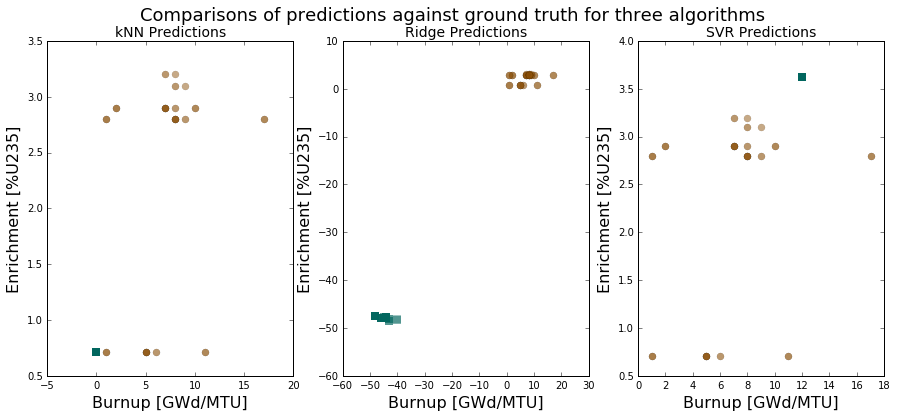

In [7]:
fig.clf()

fig, (ax_knn, ax_rr, ax_svr) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
#plt.xlim(-2, 65)
#plt.ylim(0, 6.2)
ax_knn.set_xlabel('Burnup [GWd/MTU]', fontsize=16)
ax_rr.set_xlabel('Burnup [GWd/MTU]', fontsize=16)
ax_svr.set_xlabel('Burnup [GWd/MTU]', fontsize=16)
ax_knn.set_ylabel('Enrichment [%U235]', fontsize=16)
ax_rr.set_ylabel('Enrichment [%U235]', fontsize=16)
ax_svr.set_ylabel('Enrichment [%U235]', fontsize=16)

# GROUND TRUTHS
ax_knn.scatter(x, y, c=colors['DBrwn'], s=50, alpha=0.2, linewidths=0.1, marker='o', label='Ground Truth')
ax_rr.scatter(x, y, c=colors['DBrwn'], s=50, alpha=0.2, linewidths=0.1, marker='o', label='Ground Truth')
ax_svr.scatter(x, y, c=colors['DBrwn'], s=50, alpha=0.2, linewidths=0.1, marker='o', label='Ground Truth')

# PREDICTIONS
ax_knn.scatter(low_burn[[knn]], low_enri[[knn]], c=colors['DTeal'], s=50, alpha=0.2, linewidths=0.01, marker='s', label='kNN Pred')
ax_rr.scatter(low_burn[[rr]], low_enri[[rr]], c=colors['DTeal'], s=50, alpha=0.2, linewidths=0.01, marker='s', label='Ridge Pred')
ax_svr.scatter(low_burn[[svr]], low_enri[[svr]], c=colors['DTeal'], s=50, alpha=0.2, linewidths=0.01, marker='s', label='SVR Pred')

ax_knn.set_title('kNN Predictions', fontsize=14)
ax_rr.set_title('Ridge Predictions', fontsize=14)
ax_svr.set_title('SVR Predictions', fontsize=14)
plt.suptitle('Comparisons of predictions against ground truth for three algorithms', fontsize=18)
fig.savefig('1preds-versus-trueY.png', bbox_inches='tight')
plt.show()

## SFCOMPO data set

In [8]:
#trainXY = pd.read_pickle("../sfcompo_pickles/not-scaled_trainset_nucs_fissact_8dec.pkl")
# predictions
rxtr = pd.read_csv('../results/28march2018/sfcompo_fissact_reactor_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
# MWd/MTU
burn = pd.read_csv('../results/28march2018/sfcompo_fissact_burnup_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
# %u235
enri = pd.read_csv('../results/28march2018/sfcompo_fissact_enrichment_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})
# days
cool = pd.read_csv('../results/28march2018/sfcompo_fissact_cooling_predictions.csv').rename(columns = {'Unnamed: 0':'Instance'})

rr = 'Ridge'
svr = 'SVR'
Y = 'TrueY'
knn = 'kNN'

In [9]:
x = burn[[Y]]//1000
y = enri[[Y]]
#df = pd.DataFrame({'Burnup [MW/MTHM]': x, 'Enrichmnent [Weight% U235]': y}, 
#                  columns=['Burnup [MW/MTHM]', 'Enrichmnent [Weight% U235]'])
#bin stuff
xbin = 15
ybin = 0.15
xmax = np.max(np.abs(x))
ymax = np.max(np.abs(y))
xlim = (int(xmax/xbin) + 1)*xbin
ylim = (int(ymax/ybin) + 1)*ybin
xbins = np.arange(0, xlim + xbin, xbin)
ybins = np.arange(0, ylim + ybin, ybin)
xcount, xdivs = np.histogram(x, bins=xbins)
ycount, ydivs = np.histogram(y, bins=ybins)

In [10]:
burn = burn[[rr, svr, knn]]//1000

In [11]:
#enri.max()
burn.max()
#enri.min()
#burn.min()

Ridge    63.0
SVR      63.0
kNN      63.0
dtype: float64

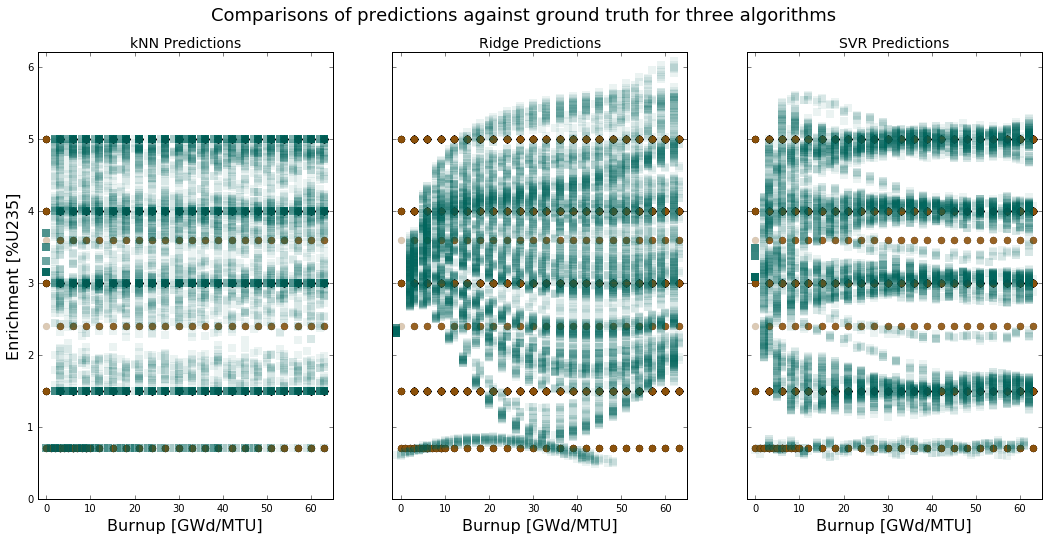

In [12]:
fig.clf()

fig, (ax_knn, ax_rr, ax_svr) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18,8))
plt.xlim(-2, 65)
plt.ylim(0, 6.2)
ax_knn.set_xlabel('Burnup [GWd/MTU]', fontsize=16)
ax_rr.set_xlabel('Burnup [GWd/MTU]', fontsize=16)
ax_svr.set_xlabel('Burnup [GWd/MTU]', fontsize=16)
ax_knn.set_ylabel('Enrichment [%U235]', fontsize=16)

# GROUND TRUTHS
ax_knn.scatter(x, y, c=colors['DBrwn'], s=50, alpha=0.3, linewidths=0.1, marker='o', label='Ground Truth')
ax_rr.scatter(x, y, c=colors['DBrwn'], s=50, alpha=0.3, linewidths=0.1, marker='o', label='Ground Truth')
ax_svr.scatter(x, y, c=colors['DBrwn'], s=50, alpha=0.3, linewidths=0.1, marker='o', label='Ground Truth')

# PREDICTIONS
ax_knn.scatter(burn[[knn]], enri[[knn]], c=colors['DTeal'], s=50, alpha=0.08, linewidths=0.01, marker='s', label='kNN Pred')
ax_rr.scatter(burn[[rr]], enri[[rr]], c=colors['DTeal'], s=50, alpha=0.08, linewidths=0.01, marker='s', label='Ridge Pred')
ax_svr.scatter(burn[[svr]], enri[[svr]], c=colors['DTeal'], s=50, alpha=0.08, linewidths=0.01, marker='s', label='SVR Pred')

ax_knn.set_title('kNN Predictions', fontsize=14)
ax_rr.set_title('Ridge Predictions', fontsize=14)
ax_svr.set_title('SVR Predictions', fontsize=14)
plt.suptitle('Comparisons of predictions against ground truth for three algorithms', fontsize=18)
fig.savefig('2preds-versus-trueY.png', bbox_inches='tight')
plt.show()

In [93]:
cool.head()

,Instance,Ridge,SVR,TrueY,kNN
0,0.000e+00,314.796729,99.475670,0.000000,0.000000
1,1.000e+02.1,58.375328,-39.648408,0.000694,0.000000
2,1.070e+02,97.690530,-11.385412,7.000000,0.471328
3,1.300e+02,179.586277,33.030576,30.000000,18.544862
4,4.653e+02,423.631540,176.708702,365.250000,707.945951
